In [30]:
import pandas as pd
import sklearn.cluster import KMeans
from matplotlib import pyplot as plt
#读取数据
sell_data=pd.read_excel('商品销售数据.xlsx')
sell_data

SyntaxError: invalid syntax (<ipython-input-30-39daa15593f9>, line 2)

In [3]:
#数据清洗
sell_data=sell_data.dropna().drop_duplicates()
sell_data=sell_data[sell_data['数量']>0]
sell_data=sell_data[sell_data['价格']>=1]
sell_data

订单号      邮编            商品描述  数量                        发货日期    价格  \
0       536365  85123A           清蒸臭豆腐   6  2010-01-12 08:26:00.000001  2.55   
1       536365   71053  self-raising面粉   6  2010-01-12 08:26:00.000001  3.39   
2       536365  84406B             佛跳墙   8  2010-01-12 08:26:00.000001  2.75   
3       536365  84029G            五香熏蛋   6  2010-01-12 08:26:00.000001  3.39   
4       536365  84029E            鸭胸脯肉   6  2010-01-12 08:26:00.000001  3.39   
...        ...     ...             ...  ..                         ...   ...   
541903  581587   23256           素炒黄花菜   4  2011-09-12 12:49:59.999998  4.15   
541905  581587   22899             早餐奶   6  2011-09-12 12:49:59.999998  2.10   
541906  581587   23254          家庭自制泡菜   4  2011-09-12 12:49:59.999998  4.15   
541907  581587   23255              挂面   4  2011-09-12 12:49:59.999998  4.15   
541908  581587   22138           椒油炝芹菜   3  2011-09-12 12:49:59.999998  4.95   

          用户 ID  国家  
0       17850.0  英国  
1       17850.0  英国  
2       17850.0  英国  
3       17850.0  英国  
4       17850.0  英国  
...         ...  ..  
541903  12680.0  法国  
541905  12680.0  法国  
541906  12680.0  法国  
541907  12680.0  法国  
541908  12680.0  法国  

[304910 rows x 8 columns]

In [4]:
sell_data['总金额']=sell_data['数量']*sell_data['价格']
sell_data

订单号      邮编            商品描述  数量                        发货日期    价格  \
0       536365  85123A           清蒸臭豆腐   6  2010-01-12 08:26:00.000001  2.55   
1       536365   71053  self-raising面粉   6  2010-01-12 08:26:00.000001  3.39   
2       536365  84406B             佛跳墙   8  2010-01-12 08:26:00.000001  2.75   
3       536365  84029G            五香熏蛋   6  2010-01-12 08:26:00.000001  3.39   
4       536365  84029E            鸭胸脯肉   6  2010-01-12 08:26:00.000001  3.39   
...        ...     ...             ...  ..                         ...   ...   
541903  581587   23256           素炒黄花菜   4  2011-09-12 12:49:59.999998  4.15   
541905  581587   22899             早餐奶   6  2011-09-12 12:49:59.999998  2.10   
541906  581587   23254          家庭自制泡菜   4  2011-09-12 12:49:59.999998  4.15   
541907  581587   23255              挂面   4  2011-09-12 12:49:59.999998  4.15   
541908  581587   22138           椒油炝芹菜   3  2011-09-12 12:49:59.999998  4.95   

          用户 ID  国家    总金额  
0       17850.0  英国  15.30  
1       17850.0  英国  20.34  
2       17850.0  英国  22.00  
3       17850.0  英国  20.34  
4       17850.0  英国  20.34  
...         ...  ..    ...  
541903  12680.0  法国  16.60  
541905  12680.0  法国  12.60  
541906  12680.0  法国  16.60  
541907  12680.0  法国  16.60  
541908  12680.0  法国  14.85  

[304910 rows x 9 columns]

In [5]:
#用户M值
M=sell_data.groupby(['用户 ID'])['总金额'].sum()
M.sort_values(ascending=False,inplace=True)
M



用户 ID
18102.0    257518.90
14646.0    241148.31
17450.0    192236.59
16446.0    168472.50
14911.0    125365.19
             ...    
15423.0         7.50
16454.0         6.90
14792.0         6.20
16878.0         3.80
16738.0         3.75
Name: 总金额, Length: 4304, dtype: float64

In [ ]:
#

In [6]:
#用户F值
F=sell_data.groupby(['用户 ID','订单号'],as_index=False)['发货日期'].max()
F=F.groupby('用户 ID')['订单号'].count()
F.sort_values(ascending=False,inplace=True)
F


用户 ID
14911.0    201
12748.0    194
17841.0    123
13089.0     96
14606.0     93
          ... 
16742.0      1
16739.0      1
16738.0      1
16737.0      1
12346.0      1
Name: 订单号, Length: 4304, dtype: int64

In [7]:
#用户R值 
today=today = '2012-01-01 00:00:00'
sell_data['R']=(pd.to_datetime(today)-pd.to_datetime(sell_data['发货日期'])).dt.days
R=sell_data.groupby('用户 ID')['R'].min()
R



用户 ID
12346.0    347
12347.0     61
12348.0     97
12349.0     40
12350.0    332
          ... 
18280.0    181
18281.0     25
18282.0    237
18283.0     31
18287.0     21
Name: R, Length: 4304, dtype: int64

In [9]:
result=pd.merge(R,F,on='用户 ID')
result=pd.merge(result,M,on='用户 ID')
result.columns=['R','F','M']
result.reset_index(inplace=True)
result

用户 ID    R   F         M
0     12346.0  347   1  77183.60
1     12347.0   61   7   3764.48
2     12348.0   97   4   1114.00
3     12349.0   40   1   1668.75
4     12350.0  332   1    295.30
...       ...  ...  ..       ...
4299  18280.0  181   1    180.60
4300  18281.0   25   1     65.70
4301  18282.0  237   2    152.45
4302  18283.0   31  16   1751.14
4303  18287.0   21   3   1514.08

[4304 rows x 4 columns]

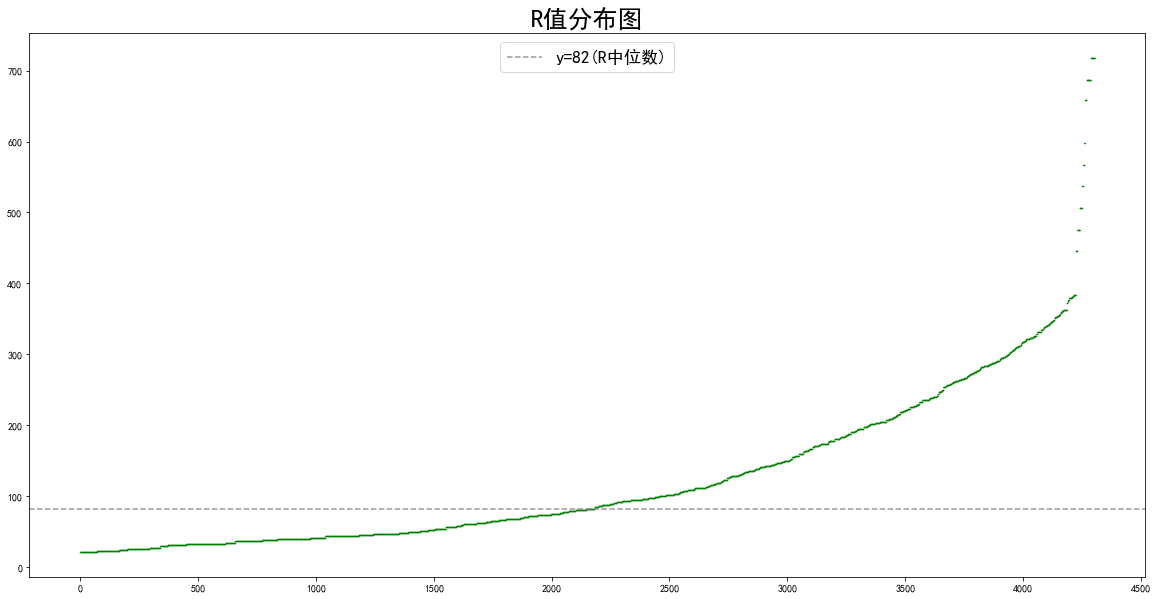

In [24]:
#画图R的分布的图

plt.rcParams['font.family']=['SimHei']
plt.figure(figsize=(20,10))
x=result.index
y=result['R'].sort_values()
plt.scatter(x,y,marker='.',s=0.5,color='g',cmap='green')
plt.xticks(ticks=[0,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.title('R值分布图',fontsize=25)
#spot<82
plt.axhline(y=82,xmin=0,xmax=1,color='grey',alpha=0.8,linestyle='--',label='y=82(R中位数)')
plt.legend(loc='upper center',fontsize='xx-large')
plt.show()


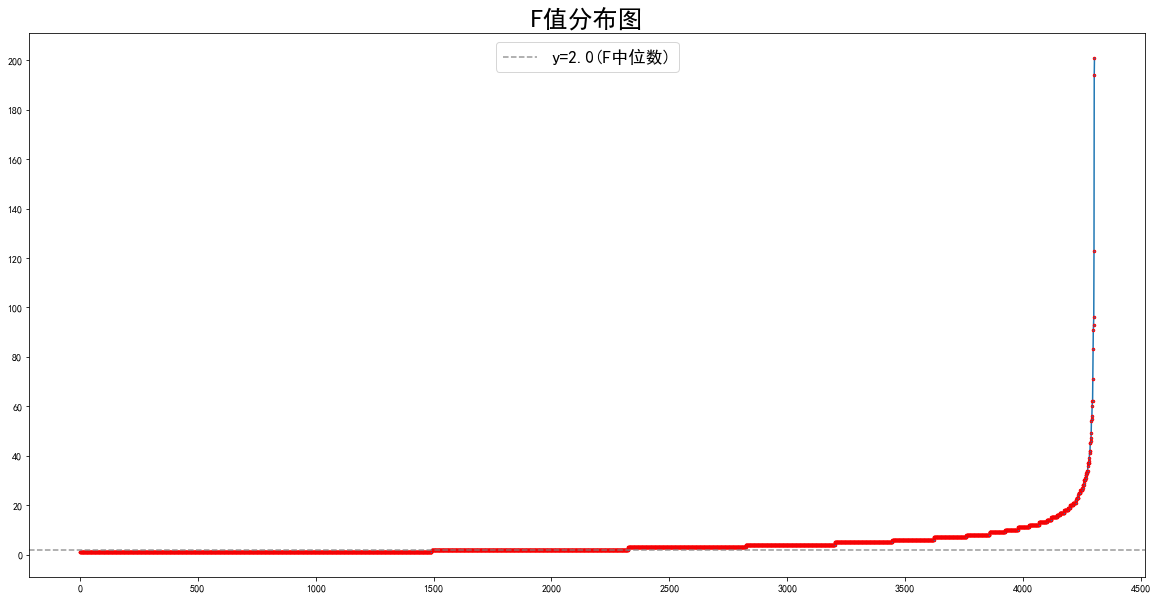

In [11]:
#画F的分布的图
import numpy as np
plt.figure(figsize=(20,10))
x=result.index
y=result['F'].sort_values()
plt.plot(x,y,marker='.',markersize=5,markeredgecolor='r')
plt.xticks(ticks=np.arange(0,5000,500))
plt.yticks(ticks=np.arange(0,220,20))
plt.title('F值分布图',fontsize=25)
plt.axhline(y=2.0,xmin=0,xmax=1,color='grey',alpha=0.8,linestyle='--',label='y=2.0(F中位数)')
plt.legend(loc='upper center',fontsize='xx-large')
plt.show()



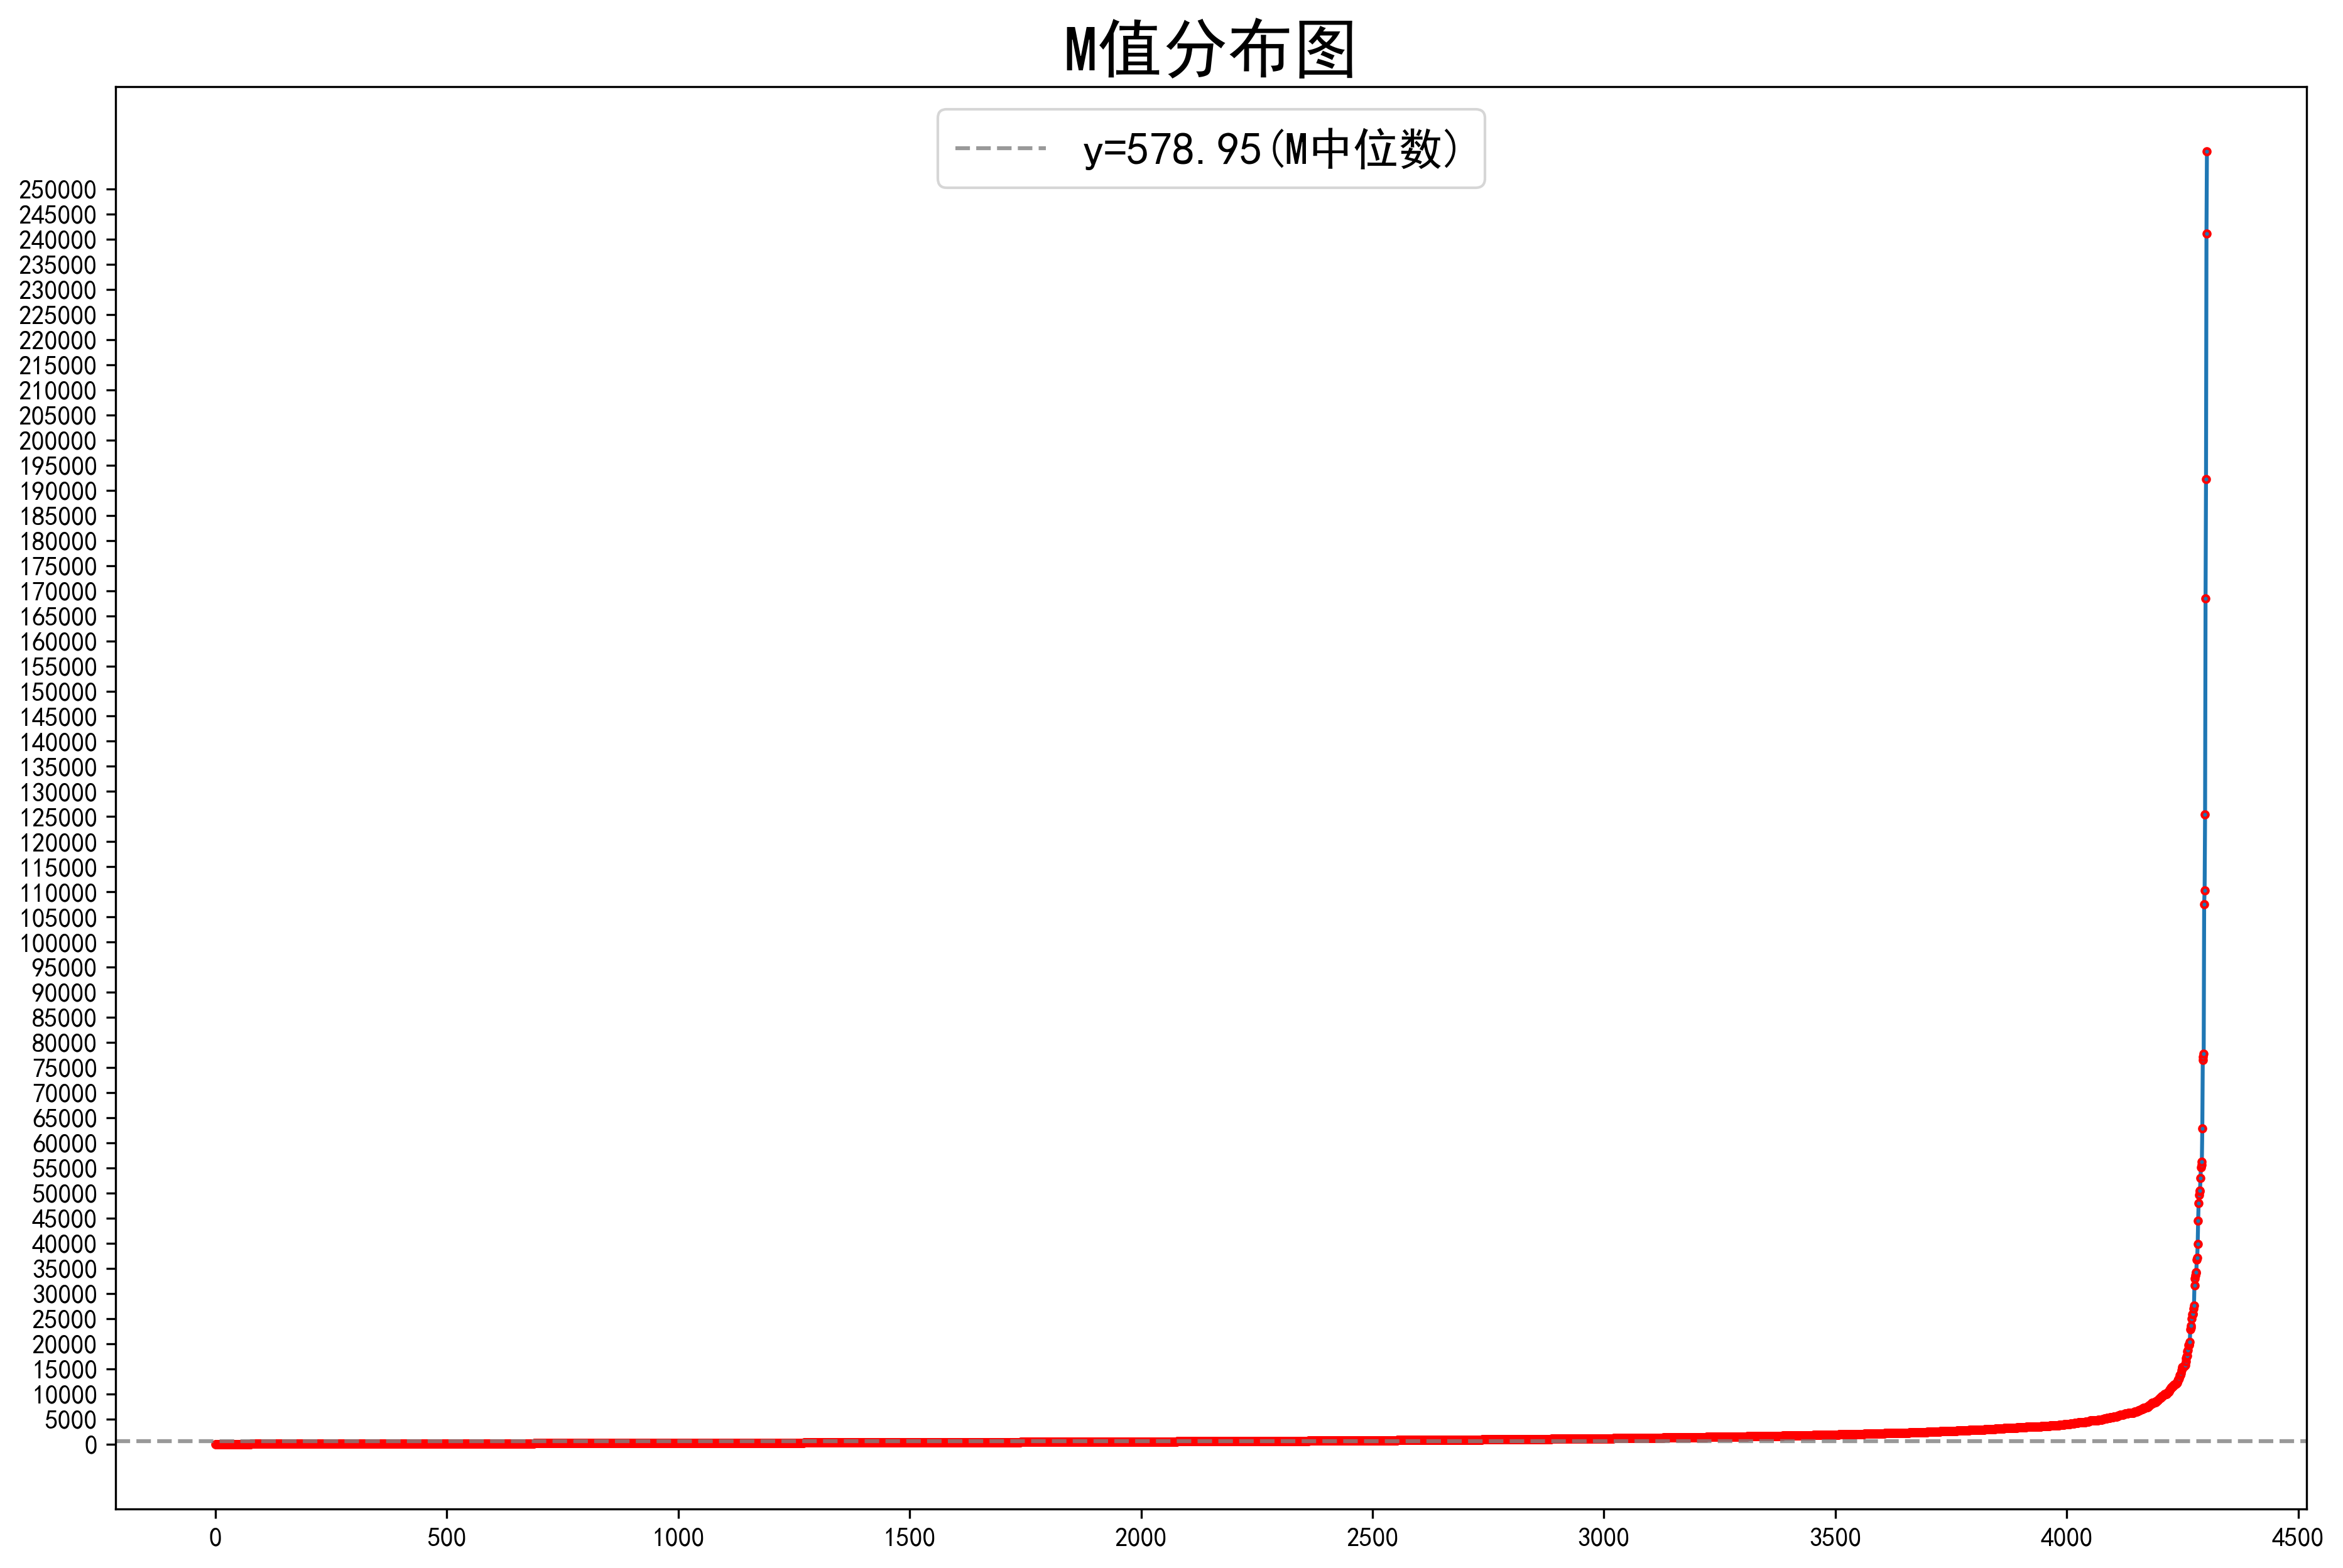

In [12]:
#画M的图
plt.figure(figsize=(15,10),dpi=300)
x=result.index
y=result['M'].sort_values()
plt.plot(x,y,marker='.',markersize=5,markeredgecolor='r')
plt.xticks(ticks=[0,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.yticks(ticks=np.arange(0,255000,5000))
plt.title('M值分布图',fontsize=25)
plt.axhline(y=578.95,xmin=0,xmax=1,color='grey',alpha=0.8,linestyle='--',label='y=578.95(M中位数)')
plt.legend(loc='upper center',fontsize='xx-large')
plt.show()